In [55]:
import cdsapi
from urllib.request import urlopen
import xarray as xr
import numpy as np
import matplotlib.pylab as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
# c = cdsapi.Client()

In [ ]:
import cdsapi

c = cdsapi.Client()

fl = c.retrieve(
    'reanalysis-era5-single-levels-monthly-means',
    {
        'format': 'netcdf',
        'product_type': 'monthly_averaged_reanalysis',
        'variable': [
            '10m_u_component_of_wind', '10m_v_component_of_wind', '2m_temperature',
            'mean_wave_direction', 'mean_wave_period', 'surface_pressure',
        ],
        'year': [
            '2016', '2017', '2018',
            '2019', '2020', '2021',
            '2022',
        ],
        'month': [
            '01', '02', '03',
            '04', '05', '06',
            '07', '08', '09',
            '10', '11', '12',
        ],
        'area': [
            -30, -180, -90,
            180,
        ],
        'time': '00:00',
    },
    'download.nc')

# load into memory
with urlopen(fl.location) as f:
    ds = xr.open_dataset(f.read())

In [34]:
ds = xr.open_dataset("D:\\Floes\\weather\\ERA5_2016-2022.nc")

In [37]:
xx, yy = np.meshgrid(ds.longitude, ds.latitude)

In [38]:
xx.shape

(241, 1440)

In [46]:
u10 = np.array(ds['u10'])
v10 = np.array(ds['v10'])

In [49]:
ds.u10.units

'm s**-1'

(-85.0, -60.0)

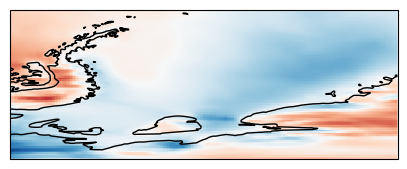

In [61]:
fig, ax = plt.subplots(1, 1, figsize=(5,5), dpi= 100, subplot_kw={'projection': ccrs.PlateCarree()})
ax.coastlines()
plt.pcolormesh(xx, yy, v10[50], vmin = -10, vmax = 10, cmap = "RdBu")
plt.xlim(-75, -10)
plt.ylim(-85, -60)

In [17]:
u10.shape

(84, 241, 1440)